<a href="https://colab.research.google.com/github/JunsooJung/Python25Study/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

겨울 대방어철 판매량 증가
무게단위 판매

다른 방어의 무게값들을 사용해 무게가 정상인지 확인하기.(회귀)

56개 샘플 사용

분류와 회귀
2진분류, 회귀


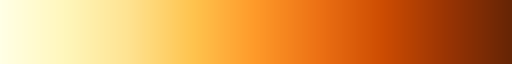

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("YlOrBr", as_cmap=True)

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 방어의 무게 배열리스트

기초자료


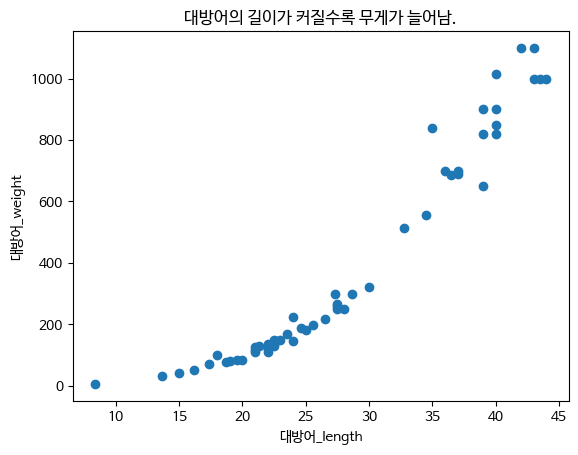

In [4]:
plt.rc('font', family='NanumBarunGothic')

plt.scatter(perch_length, perch_weight)
plt.xlabel('대방어_length')
plt.ylabel('대방어_weight')
print('기초자료')
plt.title('대방어의 길이가 커질수록 무게가 늘어남.')
plt.show()



k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor


예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.

이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함

k = 3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단

회귀는 샘플에 가장 가까운 샘플 k개를 선택

타깃값 100, 80, 60을 더해 3으로 나눈 평균이 타깃 값으로 사용됨
     

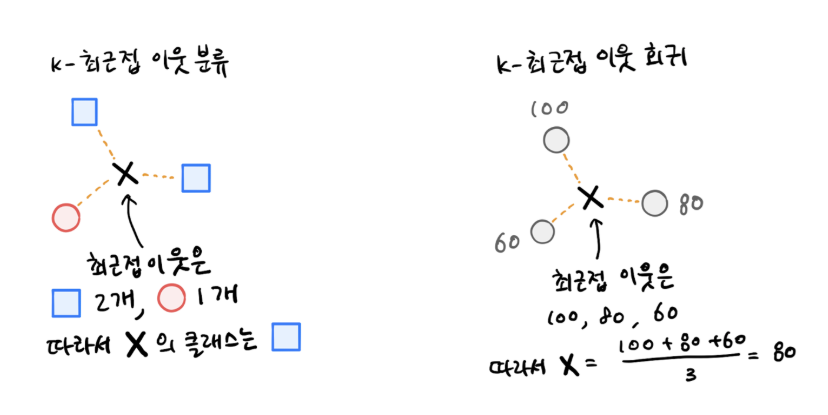

In [30]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) #시드값 고정 왜 42?

test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2, 2) # 억지로 2차원 배열 만드는 기법
print(test_array.shape)

(2, 2)


In [8]:
print(test_array)

[[1 2]
 [3 4]]


In [31]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [32]:
k = KNeighborsRegressor()
k.fit(train_input, train_target)

KNeighborsRegressor()

In [38]:
print(k.score(train_input, train_target))
print(k.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [18]:
k.predict([[60]])

array([1010.])

In [39]:
test_prediction = k.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [40]:
k.n_neighbors = 3
k.fit(train_input, train_target)
print(k.score(train_input, train_target))
print(k.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [41]:
test_prediction = k.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

35.42380952380951


In [42]:
k.n_neighbors = 7
k.fit(train_input, train_target)
print(k.score(train_input, train_target))
print(k.score(test_input, test_target))

0.9761170732051527
0.9781383949643516


In [43]:
test_prediction = k.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

32.512244897959185


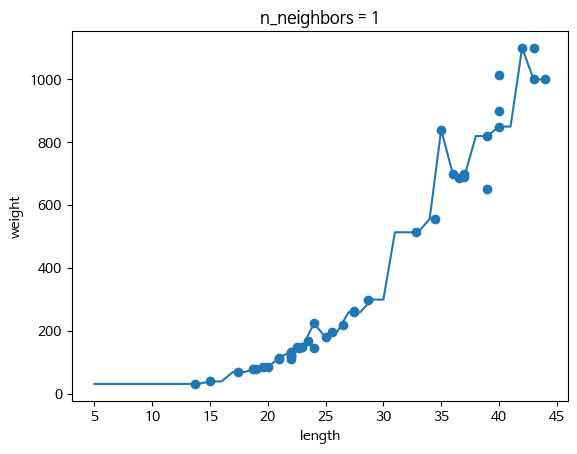

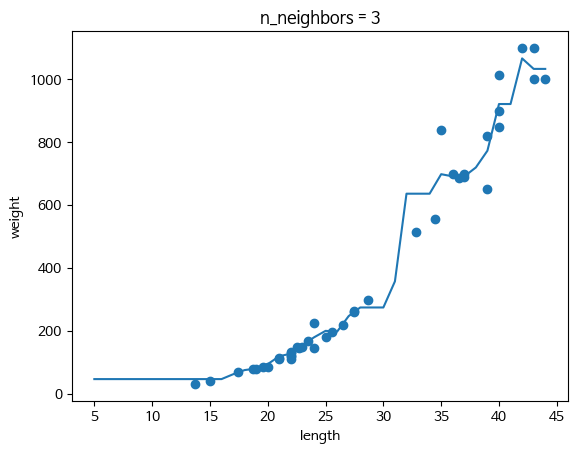

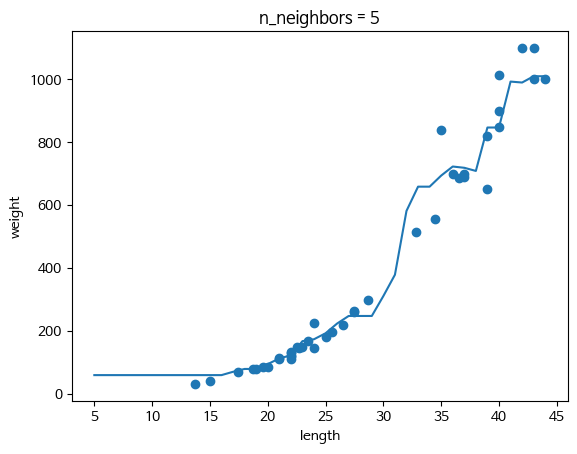

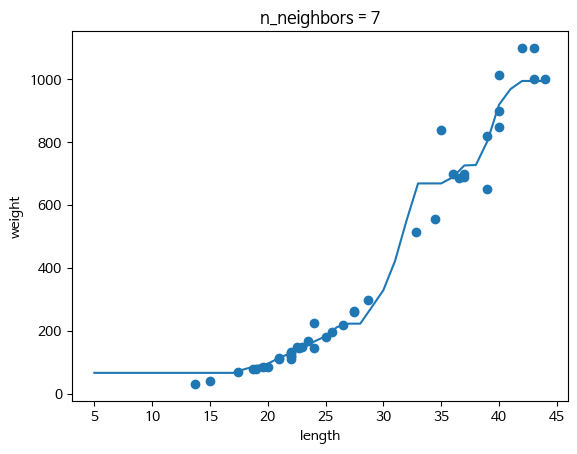

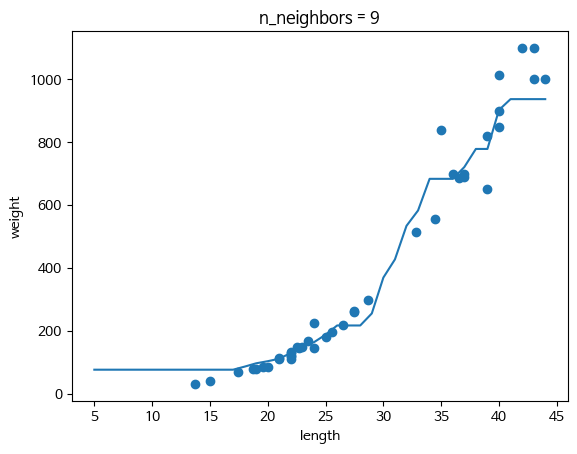

In [44]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 3, 5, 7, 9]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()